C:\Users\sergi\AppData\Local\Temp\ipykernel_10388\4091065839.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sp_polygon["x"] = sp_polygon.centroid.x
C:\Users\sergi\AppData\Local\Temp\ipykernel_10388\4091065839.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sp_polygon["y"] = sp_polygon.centroid.y


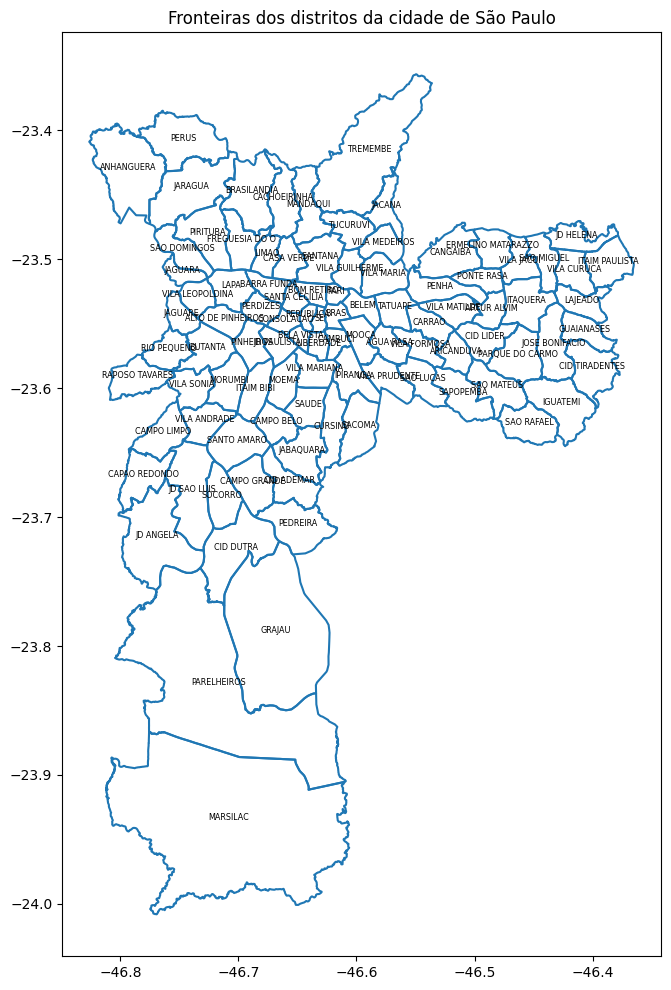

In [80]:
import geopandas as gpd
import contextily
import matplotlib.pyplot as plt 
path = r"C:\Users\sergi\python-projects"

plt.rcParams["figure.figsize"] = (12,12)
sp_polygon = gpd.read_file(path + "\\" + "layerdistrito\DEINFO_DISTRITO.shp").to_crs("EPSG:4326")
sp_polygon.boundary.plot()
plt.title("Fronteiras dos distritos da cidade de São Paulo")

sp_polygon["x"] = sp_polygon.centroid.x
sp_polygon["y"] = sp_polygon.centroid.y
for idx, row in sp_polygon.iterrows():
     plt.annotate(text=row['NOME_DIST'], # e.g. this column contains the names of each countries
                  xy=(row['x'], row['y']), # e.g. these columns are showing the coordinates of middle points of each countries
                  horizontalalignment='center', 
                  fontsize="xx-small")

In [64]:
sp_polygon.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

C:\Users\sergi\AppData\Local\Temp\ipykernel_10388\1680771463.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sp_polygon["x"] = sp_polygon.centroid.x
C:\Users\sergi\AppData\Local\Temp\ipykernel_10388\1680771463.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sp_polygon["y"] = sp_polygon.centroid.y


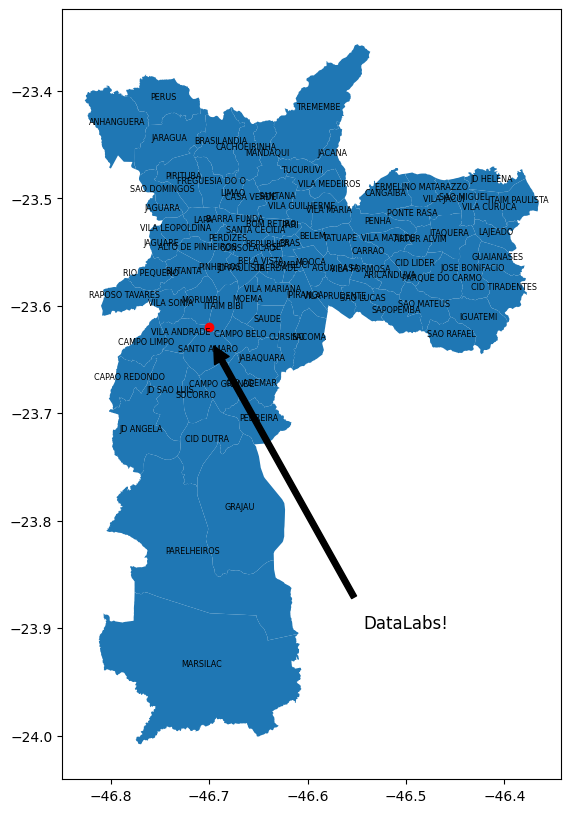

In [79]:
sp_polygon["x"] = sp_polygon.centroid.x
sp_polygon["y"] = sp_polygon.centroid.y

plt.rcParams["figure.figsize"] = (10,10)

ax = sp_polygon.plot()

import pandas as pd
df_datalab = pd.DataFrame({"local": ["Serasa Experian DataLabs"], 
 "latitude": [-23.62] ,
 "longitude":[-46.70]})
gpd_datalab = gpd.GeoDataFrame(df_datalab, 
                               geometry=gpd.points_from_xy(df_datalab.longitude, df_datalab.latitude), 
                               crs="EPSG:4326")
coord_datalabs = (-46.70327025815908, -23.62430978223035)
coord_text = (-46.5, -23.9)
gpd_datalab.plot(ax=ax, color='red')
plt.annotate(text="DataLabs!", # e.g. this column contains the names of each countries
                  xy=coord_datalabs, # e.g. these columns are showing the coordinates of middle points of each countries
                  xytext=coord_text,
                  arrowprops=dict(facecolor='black', shrink=0.05),
                  horizontalalignment='center', 
                  fontsize="large")

for idx, row in sp_polygon.iterrows():
     plt.annotate(text=row['NOME_DIST'], # e.g. this column contains the names of each countries
                  xy=(row['x'], row['y']), # e.g. these columns are showing the coordinates of middle points of each countries
                  horizontalalignment='center', 
                  fontsize="xx-small")


<Axes: >

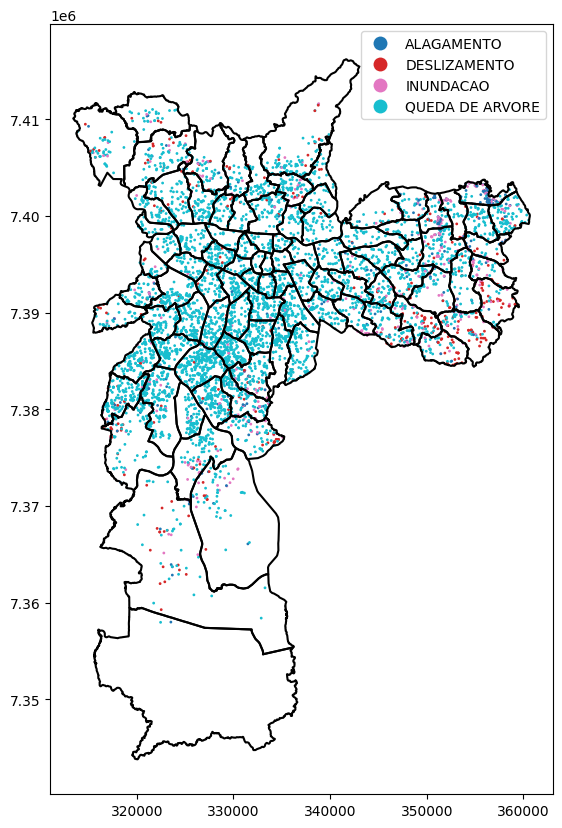

In [25]:

sp_polygon = gpd.read_file(path + "\\" + "layerdistrito\DEINFO_DISTRITO.shp")
ax = sp_polygon.boundary.plot(color='black')

gdf_ocorrencias_2023 = gpd.read_file(path + "\\" + "SIRGAS_SHP_riscoocorrencia\SIRGAS_SHP_riscoocorrencia_2023.shp")
gdf_ocorrencias_2023.plot(ax=ax, markersize=1, column = "ocorrencia", legend=True)